In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/restaurant-business-rankings-2020/Top250.csv
/kaggle/input/restaurant-business-rankings-2020/Future50.csv
/kaggle/input/restaurant-business-rankings-2020/Independence100.csv


In [2]:
# Importing any additional libraries that may be useful

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

In [3]:
# Reading in the data
df = pd.read_csv("../input/restaurant-business-rankings-2020/Top250.csv")

In [4]:
# Viewing the data
df.head(10)

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger
5,6,Subway,NaN,10200,-2.0%,23801,-4.0%,NaN,Quick Service & Sandwich
6,7,Wendy's,NaN,9762,4.2%,5852,0.7%,NaN,Quick Service & Burger
7,8,Dunkin',"Dunkin' dropped ""Donuts"" from its name and rep...",9228,5.0%,9630,2.2%,NaN,Quick Service & Coffee Cafe
8,9,Domino's,NaN,7044,6.9%,6126,4.3%,NaN,Quick Service & Pizza
9,10,Panera Bread,NaN,5890,4.0%,2160,3.2%,NaN,Fast Casual & Bakery Cafe


In [5]:
# Looking for missing data using for loops
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

# Seems to be that 'Content' and 'Headquarters' are missing data
# Upon reviewing, the missing data is not pertinent to the analysis

Rank - 0%
Restaurant - 0%
Content - 87%
Sales - 0%
YOY_Sales - 0%
Units - 0%
YOY_Units - 0%
Headquarters - 79%
Segment_Category - 0%


In [6]:
# Data Types for our columns

print(df.dtypes)

Rank                 int64
Restaurant          object
Content             object
Sales                int64
YOY_Sales           object
Units                int64
YOY_Units           object
Headquarters        object
Segment_Category    object
dtype: object


In [7]:
# Continuously cleaning data before analysis

df.drop_duplicates()


,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger
...,...,...,...,...,...,...,...,...,...
245,246,Rainforest Cafe,NaN,129,-10.4%,18,-5.3%,NaN,Varied Menu
246,247,PDQ,NaN,127,-5.5%,56,-11.1%,NaN,Chicken
247,248,Lupe Tortilla,NaN,127,12.1%,25,8.7%,NaN,Mexican
248,249,Cook-Out Restaurant,NaN,126,10.1%,270,7.1%,NaN,Burger


Text(0, 0.5, 'Rank')

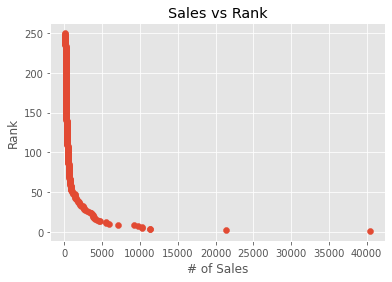

In [8]:
plt.scatter(x = df['Sales'], y = df['Rank'])
plt.show

plt.title('Sales vs Rank')
plt.xlabel('# of Sales')
plt.ylabel('Rank')
# Obvious correlation between 'Sales' and 'Rank'
# Curious to look for other correlation between other variables. 

Text(0, 0.5, 'Units')

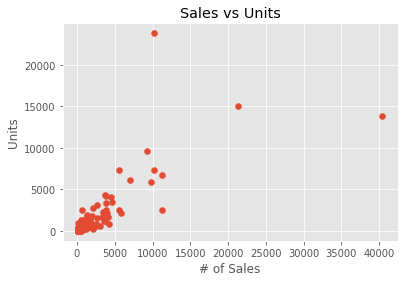

In [9]:
plt.scatter(x = df['Sales'], y = df['Units'])
plt.show

plt.title('Sales vs Units')
plt.xlabel('# of Sales')
plt.ylabel('Units')

# Units relating to the amount of locations that specific restaurant actively has
# Some outliers represeted but generally seems like a positive correlation

<AxesSubplot:xlabel='Sales', ylabel='Units'>

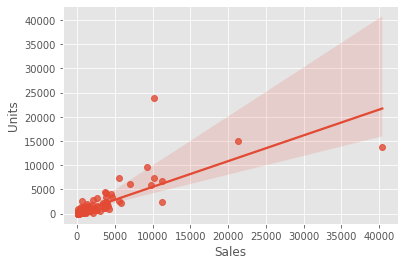

In [10]:
# Quick glance at correlation between 'Sales' and 'Units'

sns.regplot(x="Sales", y="Units", data=df)


In [11]:
# Forming the correlation matrix

df.corr(method ='pearson')

,Rank,Sales,Units
Rank,1.000000,-0.462349,-0.450929
Sales,-0.462349,1.000000,0.780101
Units,-0.450929,0.780101,1.000000


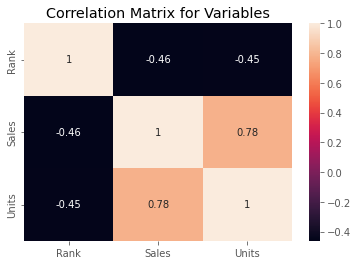

In [12]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for Variables")


plt.show()

# Easier way to visualize correlations between 
# numeric values within the dataset.


In [13]:
# Found correlation between 'Sales' and 'Units' although 
# just because a company managed to have more units did not 
# mean that they necessarily placed better in the rankings. 

In [14]:
# Exploring new dataset
df2 = pd.read_csv("../input/restaurant-business-rankings-2020/Independence100.csv")

In [15]:
df2.head(10)

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served
0,1,Carmine's (Times Square),39080335.0,40,New York,N.Y.,469803.0
1,2,The Boathouse Orlando,35218364.0,43,Orlando,Fla.,820819.0
2,3,Old Ebbitt Grill,29104017.0,33,Washington,D.C.,892830.0
3,4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,N.Y.,198500.0
4,5,Bryant Park Grill & Cafe,26900000.0,62,New York,N.Y.,403000.0
5,6,Gibsons Bar & Steakhouse,25409952.0,80,Chicago,Ill.,348567.0
6,7,Top of the World at the STRAT,25233543.0,103,Las Vegas,Nev.,246054.0
7,8,Maple & Ash,24837595.0,99,Chicago,Ill.,210832.0
8,9,Balthazar,24547800.0,87,New York,N.Y.,519000.0
9,10,Smith & Wollensky,24501000.0,107,New York,N.Y.,257364.0


In [16]:
# Looking for missing data using for loops in second data set

for col in df2.columns:
    pct_missing = np.mean(df2[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
 # No data seems to be missing as represented by the "0%"

Rank - 0%
Restaurant - 0%
Sales - 0%
Average Check - 0%
City - 0%
State - 0%
Meals Served - 0%


In [17]:
print(df2.dtypes)

# 'Sales' and 'Meals Served' columns seem to have an unneeded decimal point
# so it may be better to rid that to clean up the data

Rank               int64
Restaurant        object
Sales            float64
Average Check      int64
City              object
State             object
Meals Served     float64
dtype: object


In [18]:
df2['Sales'] = df2['Sales'].astype('int64')

df2 ['Meals Served'] = df2['Meals Served'].astype('int64')

 # 'Sales' and 'Meals Served' data type changed from float64 to int64 
 # for increased readability

In [19]:
print(df2.dtypes)

Rank              int64
Restaurant       object
Sales             int64
Average Check     int64
City             object
State            object
Meals Served      int64
dtype: object


Text(0, 0.5, 'Rank')

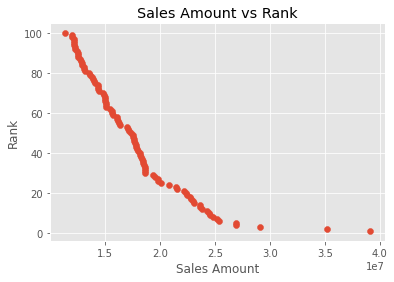

In [20]:
plt.scatter(x = df2['Sales'], y = df2['Rank'])
plt.show

plt.title('Sales Amount vs Rank')
plt.xlabel('Sales Amount')
plt.ylabel('Rank')

# Rank is solely based on sales amount, visualizing anyway to 
# see if there are any outliers

<AxesSubplot:xlabel='Sales', ylabel='Rank'>

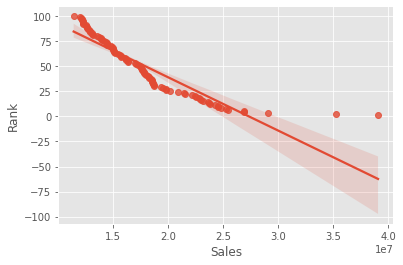

In [21]:
sns.regplot(x="Sales", y="Rank", data=df2)

# Correlation seems to be strongly negative as predicted,
# as the amount of sales go down, so does the rank


Text(0, 0.5, 'Check Amount')

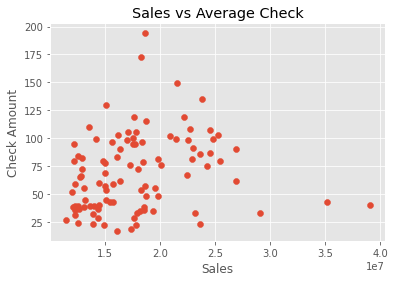

In [22]:
plt.scatter(x = df2['Sales'], y = df2['Average Check'])
plt.show

plt.title('Sales vs Average Check')
plt.xlabel('Sales')
plt.ylabel('Check Amount')

# Vizualiztation correlation between 'average check' and 'Sales'
# Difficult to point out any correlation at the moment but seems like
# it's barely sloping positively

<AxesSubplot:xlabel='Sales', ylabel='Average Check'>

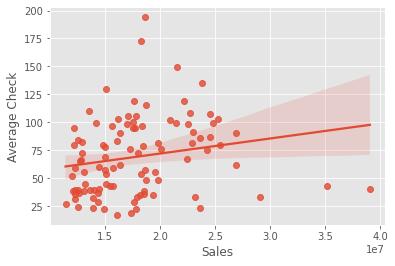

In [23]:
sns.regplot(x="Sales", y="Average Check", data=df2)

# Regression line shows weak correlation 


Text(0, 0.5, 'Average Check Amount')

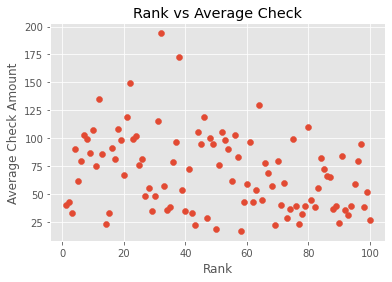

In [24]:
plt.scatter(x = df2['Rank'], y = df2['Average Check'])
plt.show

plt.title('Rank vs Average Check')
plt.xlabel('Rank')
plt.ylabel('Average Check Amount')

# At first glance, datapoints seem scattered and correlation is not 
# easily detectable

<AxesSubplot:xlabel='Rank', ylabel='Average Check'>

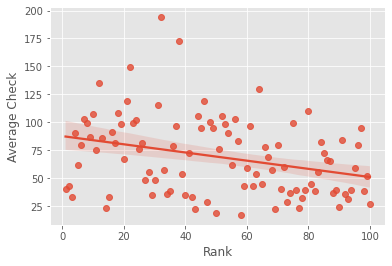

In [25]:
sns.regplot(x="Rank", y="Average Check", data=df2)

# Data showing another weak correlation here

In [26]:
# May be more useful to find out the correlation coefficient to 
# better analyze the relationship between the variables 

df2.corr(method ='pearson')

,Rank,Sales,Average Check,Meals Served
Rank,1.000000,-0.917341,-0.305996,-0.247434
Sales,-0.917341,1.000000,0.194195,0.302014
Average Check,-0.305996,0.194195,1.000000,-0.627206
Meals Served,-0.247434,0.302014,-0.627206,1.000000


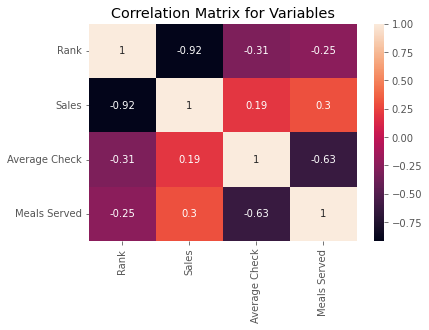

In [27]:
# Here are those above results visualized

correlation_matrix = df2.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for Variables")


plt.show()

# Data seems to show various weak correlations between the 
# variables except for the obvious one of Rank and Sales. 

# The next "strongest" correlation would be between the Average Check
# and Meals Served albeit a strong negative correlation.
# The higher the average check, the lower the amount of meals served. 


In [28]:
# Exploring third dataset
df3 = pd.read_csv("../input/restaurant-business-rankings-2020/Future50.csv")

In [29]:
# Peek at data
df3.head(10)

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes
5,6,Playa Bowls,"Belmar, N.J.",39,62.9%,76,28.8%,580,Yes
6,7,The Simple Greek,"Blue Bell, Pa.",24,52.5%,36,33.3%,775,Yes
7,8,Melt Shop,"New York, N.Y.",20,39.6%,19,35.7%,1260,Yes
8,9,Creamistry,"Yorba Linda, Calif.",24,36.8%,60,27.7%,465,Yes
9,10,Joella's Hot Chicken,"Louisville, Ky.",29,35.5%,17,30.8%,1930,No


In [30]:
# This 'Future 50' data seems to rank based "YOY_ Sales"
# rather than 'Sales' as per the "Top 50" data set

# Looking for missing data using for loops in third data set

for col in df3.columns:
    pct_missing = np.mean(df3[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
 # No data seems to be missing as represented by the "0%"


Rank - 0%
Restaurant - 0%
Location - 0%
Sales - 0%
YOY_Sales - 0%
Units - 0%
YOY_Units - 0%
Unit_Volume - 0%
Franchising - 0%


In [31]:
print(df3.dtypes)

# no floats so data shouldn't be as messy to work with


Rank            int64
Restaurant     object
Location       object
Sales           int64
YOY_Sales      object
Units           int64
YOY_Units      object
Unit_Volume     int64
Franchising    object
dtype: object


Text(0, 0.5, 'Rank')

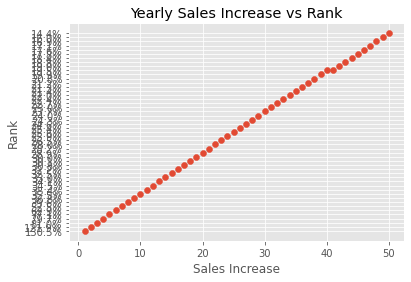

In [32]:
plt.scatter(x = df3['Rank'], y = df3['YOY_Sales'])
plt.show

plt.title('Yearly Sales Increase vs Rank')
plt.xlabel('Sales Increase')
plt.ylabel('Rank')